In [1]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# plt.rcParams["font.family"]="Brix Sans"
plt.rcParams.update({'font.size': 32})
%config InlineBackend.figure_format="retina"

In [2]:
# colour palettes

core=["#182B49","#006A96","#C69214","#FFCD00"]
accents=["#00C6D7","#6E963B","#F3E500","#FC8900"]

# font
prop = fm.FontProperties(fname='/Users/indigo410/opt/anaconda3/envs/dsp/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/Brix Sans Medium.otf')

# Faculty Composition

In [3]:
r1=requests.get("https://datascience.ucsd.edu/core-faculty/")

soup1=BeautifulSoup(r1.text)

r1.close()

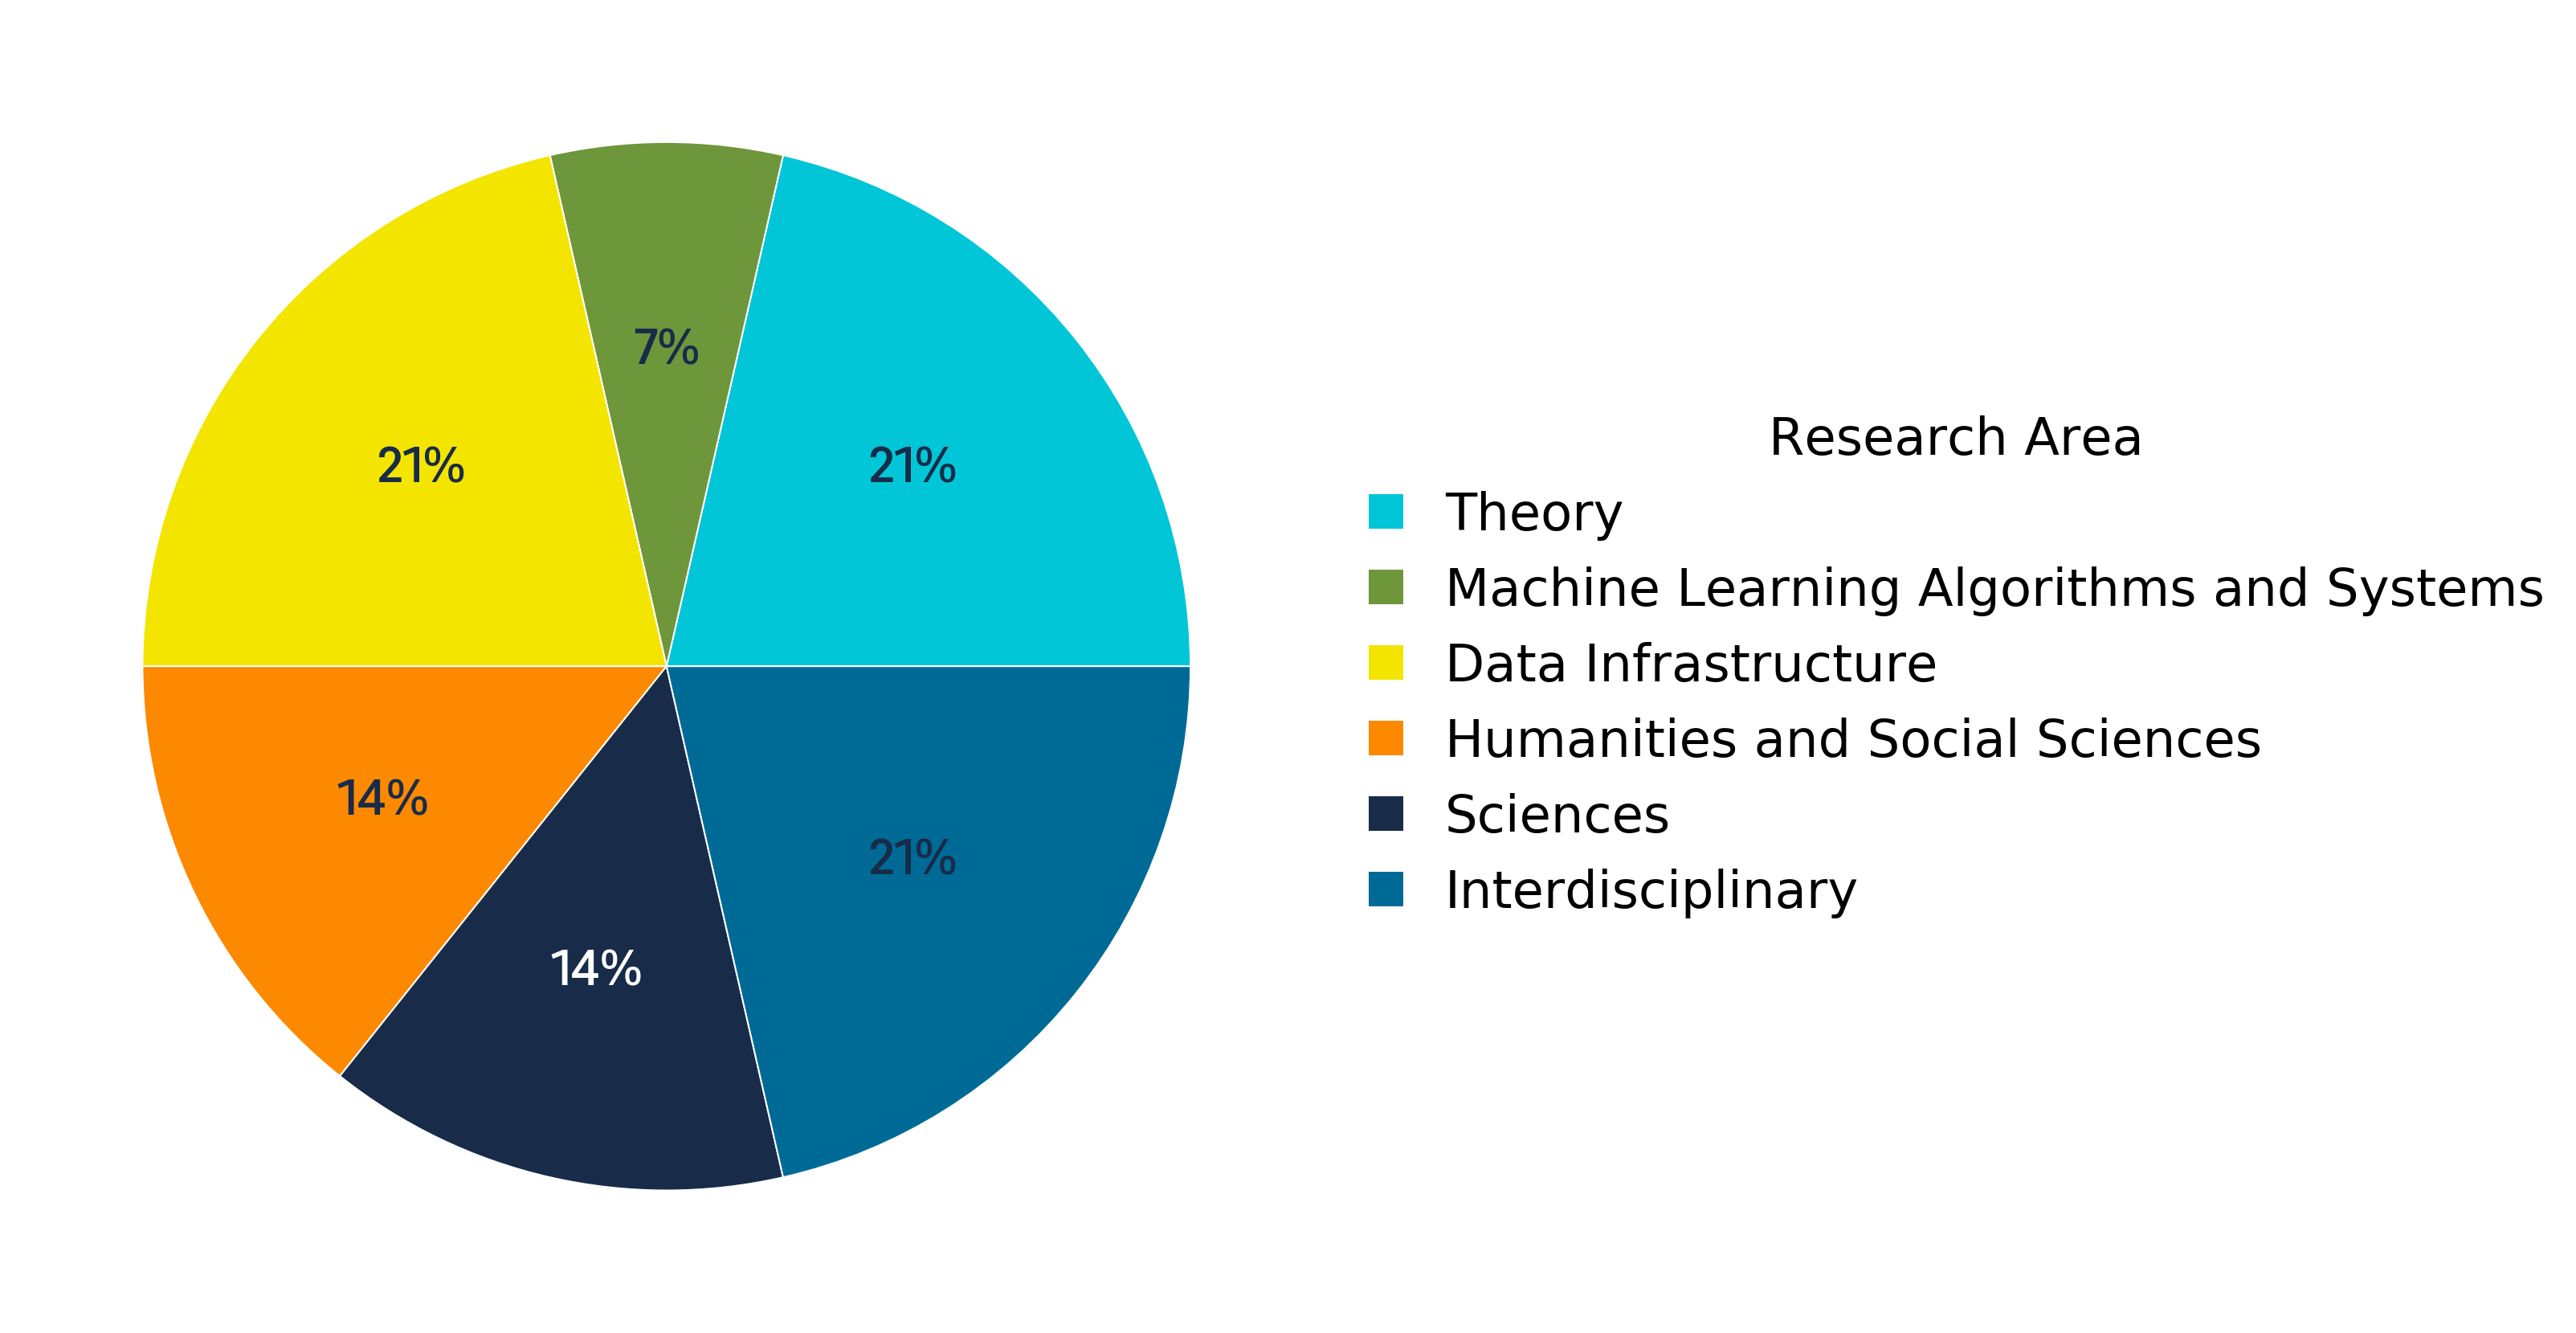

In [6]:
# data
fields=list(map(lambda x: x.string,soup1.find_all("a",class_="elementor-accordion-title")))

fields_soup=soup1.find_all("div",class_="elementor-accordion-item")
faculty_cnt=list(map(lambda x: len(x.find_all("div","staff-member")),fields_soup))


# pie chart
plt.figure(figsize=(15,15))
patches, texts, autotexts=plt.pie(faculty_cnt,
                                  autopct='%.0f%%',
                                  colors=accents+core,
                                  wedgeprops=dict(edgecolor='w'),
                                  textprops={"fontproperties":prop})
# legend and labels
for ix in range(len(autotexts)):
    autotexts[ix].set_color(core[0])
autotexts[4].set_color('white')

plt.legend(patches, fields,
          title="Research Area",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          frameon=False,
          handlelength=.7)

plt.plot();

# Major requirements

In [15]:
r2=requests.get("https://datascience.ucsd.edu/academics/undergraduate/major-requirements/")

soup2=BeautifulSoup(r2.text)

r2.close()

In [48]:
reqSoup=soup2.find_all("div",class_="elementor-text-editor elementor-clearfix")
reqSoup=reqSoup[3:5]

lower_core=list(map(lambda x: x.find("em").string,reqSoup[0].find_all("li")))
lower_core

['Data Science',
 'Mathematics',
 'Subject Domain Courses',
 'Business Analytics and Econometrics',
 'Machine Learning and Artificial Intelligence',
 'Science',
 'Social Sciences']